# Questão de Negócio

## 1. Quais são os imóveis que a House Rocket deveria comprar e por qual preço ?

## 2. Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço ?

## Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

## Data Extraction

In [5]:
data = pd.read_csv('../data/kc_house_data.csv')

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5,-122.3,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7,-122.3,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7,-122.2,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5,-122.4,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6,-122.0,1800,7503


In [7]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

## Data Transformation

In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data['month'] = data['date'].dt.strftime('%m-%Y')
data['month'] = pd.to_datetime(data['month'])
data['month'].head()

0   2014-10-01
1   2014-12-01
2   2015-02-01
3   2014-12-01
4   2015-02-01
Name: month, dtype: datetime64[ns]

In [10]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5,-122.3,1340,5650,2014-10-01
1,6414100192,2014-12-09,538000.0,3,2.2,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7,-122.3,1690,7639,2014-12-01
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7,-122.2,2720,8062,2015-02-01
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5,-122.4,1360,5000,2014-12-01
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6,-122.0,1800,7503,2015-02-01


## Data Exploration

### Flutuation of price in year

In [39]:
data['price'].describe()

count     21613.0
mean     540088.1
std      367127.2
min       75000.0
25%      321950.0
50%      450000.0
75%      645000.0
max     7700000.0
Name: price, dtype: float64

In [64]:
data['condition'].unique()

array([3, 5, 4, 1, 2])

<AxesSubplot:>

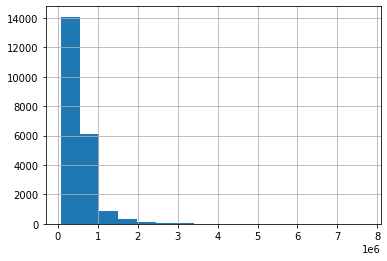

In [42]:
data['price'].hist(bins='sturges')

<AxesSubplot:xlabel='date'>

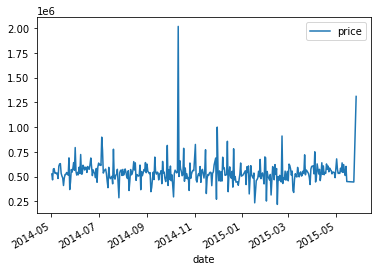

In [19]:
data[['date', 'price']].groupby('date').mean().plot()

<AxesSubplot:xlabel='month'>

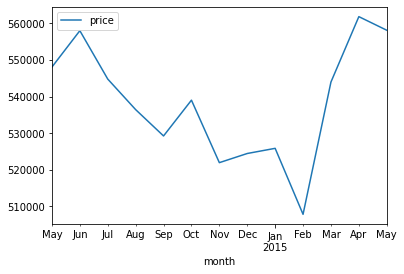

In [55]:
data[['month', 'price']].groupby('month').mean().plot()

In [65]:
_ = data[['month', 'price']].groupby('month').mean()
fig = px.line(_, _.index, 'price', title='Average price by month')
fig.add_hline(y=_.mean()[0], annotation_text='General Mean', line_dash='dot', annotation_position='bottom right')
fig.show()

In [52]:
_.mean()[0]

538437.2477703531

In [59]:
_ = data[['month', 'price']].groupby('month').median()
fig = px.line(_, _.index, 'price', title='Median price by month')
fig.add_hline(y=_.mean()[0], annotation_text='General Median', line_dash='dot', annotation_position='bottom right')
fig.show()

The prices is lower in the initial and end months of the years.

### Fluctuation of price by location

In [74]:
df_price_median = data[['zipcode', 'price']].groupby('zipcode').median().reset_index()
df_price_median.columns = ['zipcode', 'price_median_zipcode']
df_price_median.head()

,zipcode,price_median_zipcode
0,98001,260000.0
1,98002,235000.0
2,98003,267475.0
3,98004,1150000.0
4,98005,765475.0


In [76]:
data = pd.merge(data, df_price_median, on='zipcode')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,price_median_zipcode
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5,-122.3,1340,5650,2014-10-01,278277.0
1,4060000240,2014-06-23,205425.0,2,1.0,880,6780,1.0,0,0,...,0,1945,0,98178,47.5,-122.2,1190,6780,2014-06-01,278277.0
2,4058801670,2014-07-17,445000.0,3,2.2,2100,8201,1.0,0,2,...,480,1967,0,98178,47.5,-122.2,2660,8712,2014-07-01,278277.0
3,2976800796,2014-09-25,236000.0,3,1.0,1300,5898,1.0,0,0,...,0,1961,0,98178,47.5,-122.3,1320,7619,2014-09-01,278277.0
4,6874200960,2015-02-27,170000.0,2,1.0,860,5265,1.0,0,0,...,0,1931,0,98178,47.5,-122.3,1650,8775,2015-02-01,278277.0


In [87]:
data_decision_1 = data[['id', 'zipcode', 'price', 'price_median_zipcode', 'condition']]
data_decision_1.head()

,id,zipcode,price,price_median_zipcode,condition
0,7129300520,98178,221900.0,278277.0,3
1,4060000240,98178,205425.0,278277.0,4
2,4058801670,98178,445000.0,278277.0,3
3,2976800796,98178,236000.0,278277.0,3
4,6874200960,98178,170000.0,278277.0,3


In [88]:
data_decision_1['recommendation'] = 'NaN'
for i in range(len(data_decision_1)):
    if data_decision_1['price'].iloc[i] < data_decision_1['price_median_zipcode'].iloc[i] and data_decision_1['condition'].iloc[i] >= 3:
        data_decision_1['recommendation'].iloc[i] = 'Buy'
    else:
        data_decision_1['recommendation'].iloc[i] = "Don't Buy"

/tmp/ipykernel_17927/70692167.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/mg/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
data_decision_1.head()

,id,zipcode,price,price_median_zipcode,condition,recommendation
0,7129300520,98178,221900.0,278277.0,3,Buy
1,4060000240,98178,205425.0,278277.0,4,Buy
2,4058801670,98178,445000.0,278277.0,3,Don't Buy
3,2976800796,98178,236000.0,278277.0,3,Buy
4,6874200960,98178,170000.0,278277.0,3,Buy


In [94]:
data_decision_1['recommendation'].value_counts(normalize=True)

Don't Buy   0.5
Buy         0.5
Name: recommendation, dtype: float64

The model of decision to buy the house lower that the median of region and with condition equal or grather than 3 is 50% to buy.

### Fluctuation of price by quarter

In [103]:
data['quarter'] = data['date'].dt.quarter
data[['date', 'quarter']].head()

,date,quarter
0,2014-10-13,4
1,2014-06-23,2
2,2014-07-17,3
3,2014-09-25,3
4,2015-02-27,1


<AxesSubplot:xlabel='quarter'>

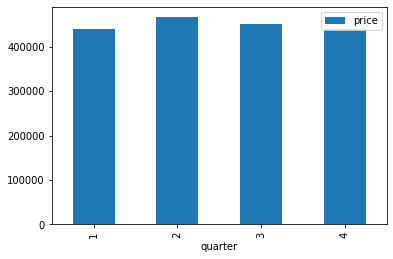

In [109]:
data[['quarter', 'price']].groupby('quarter').median().plot(kind='bar')